In [1]:
%matplotlib inline

In [2]:
# created by Shivank Goel
import matplotlib.pyplot as plt
import numpy as np
from numpy.linalg import pinv as inv

In [3]:
chirp_cnts = np.array([20, 16, 20, 18, 17, 16, 15, 17, 15, 16, 15, 17, 16, 17, 14]) 
temps = np.array([89, 72, 93, 84, 81, 75, 70, 82, 69, 83, 80, 83, 81, 84, 76]) 
b = temps

Text(0, 0.5, 'temperature (F)')

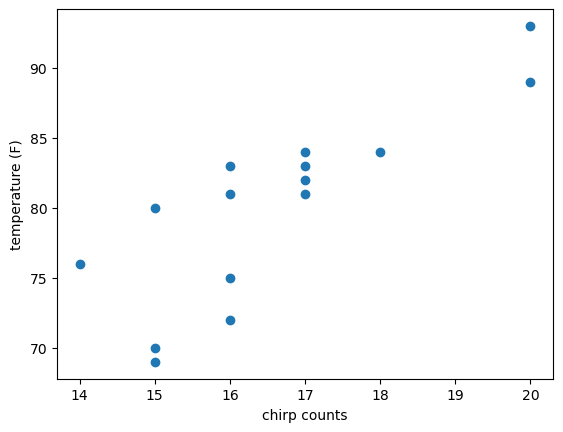

In [4]:
plt.scatter(chirp_cnts, temps)
plt.xlabel("chirp counts")
plt.ylabel("temperature (F)")

In [5]:
A = np.column_stack((chirp_cnts, np.ones(len(chirp_cnts))))
x_backslash = np.matmul(np.linalg.pinv(A),  b)

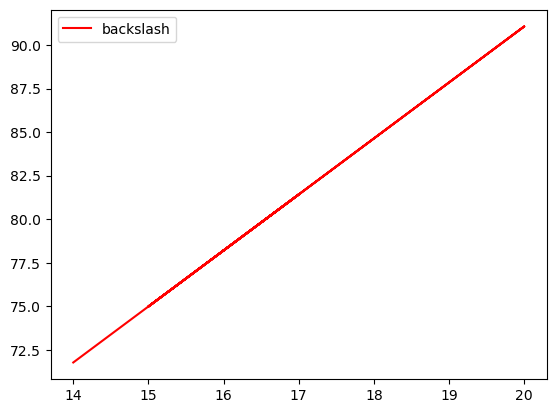

In [6]:
plt.plot(chirp_cnts, np.matmul(A, x_backslash), 'r', label="backslash")
plt.legend(loc="best")

In [7]:
r = (A @ x_backslash) - temps
# This should be on paper zero
np.linalg.norm(r.T @ A)

3.6034535784270287e-12

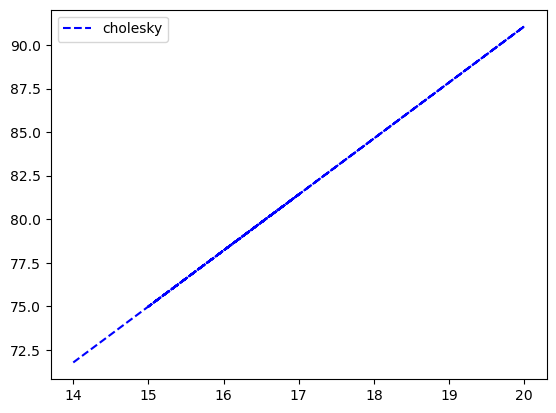

In [8]:
# Cholesky Decomposition
L = np.linalg.cholesky(A.T @ A)
x_chol = inv(L).T @ inv(L) @ A.T @ b
plt.plot(chirp_cnts, np.matmul(A, x_chol), 'b--', label="cholesky")
plt.legend(loc="best")

[[-64.61423992   0.        ]
 [ -3.8536397   -0.38660196]]
[[64.61423992  0.        ]
 [ 3.8536397   0.38660196]]


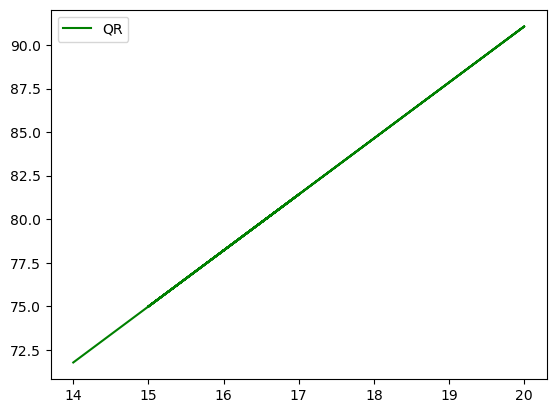

In [9]:
# QR Decomposition
Q, R = np.linalg.qr(A)
# Note that R transpose and L are same upto sign
print(R.T)
print(L)
# Print the QR decision line
x_qr = inv(R) @ Q.T @ b
plt.plot(chirp_cnts, np.matmul(A, x_qr), 'g-', label="QR")
plt.legend(loc="best")

(15, 2) (2,) (2, 2)


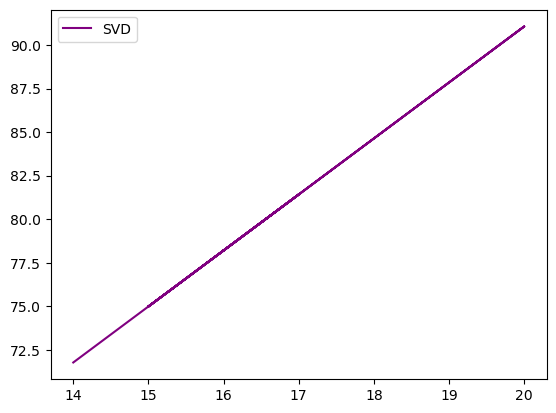

In [10]:
# SVD Decomposition
U, S, V_T = np.linalg.svd(A, full_matrices=False)
print(U.shape, S.shape, V_T.shape)
x_svd = V_T.T @ inv(np.diag(S)) @ U.T @ b
plt.plot(chirp_cnts, np.matmul(A, x_svd), color="purple" , label="SVD")
plt.legend(loc="best")

(5.99999968, 6.00000032)

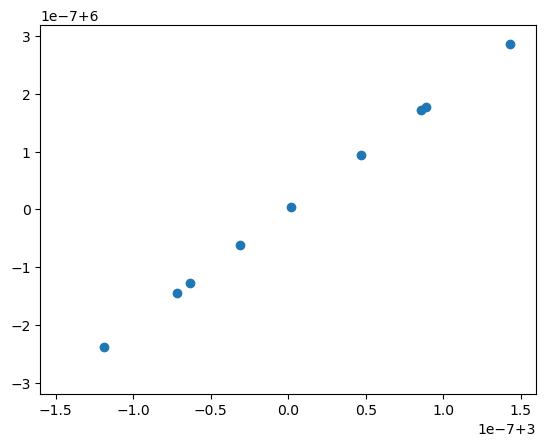

In [11]:
%matplotlib inline
np.random.seed(1234)
n = 10
feats = 3 * np.ones(n) + 1e-7 * np.random.randn(n)
b = 2 * feats
plt.scatter(feats, b)
l, r = (3-1.6e-7, 3+1.6e-7)
plt.xlim(l, r)
plt.ylim(2*l, 2*r)

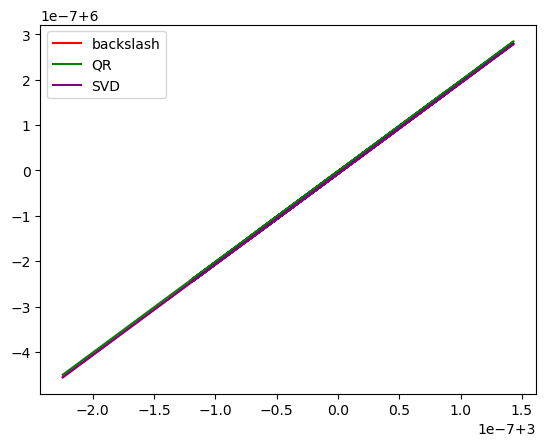

In [12]:
%matplotlib inline
A = np.column_stack((feats, np.ones(n)))
x_backslash = np.matmul(np.linalg.pinv(A), b)
plt.plot(feats, np.matmul(A, x_backslash), 'r', label="backslash")
plt.legend(loc="best")

# QR Decomposition
Q, R = np.linalg.qr(A)
x_qr = inv(R) @ Q.T @ b
plt.plot(feats, np.matmul(A, x_qr), 'g-', label="QR")
plt.legend(loc="best")

# SVD Decomposition
U, S, V_T = np.linalg.svd(A, full_matrices=False)
x_svd = V_T.T @ inv(np.diag(S)) @ U.T @ b
plt.plot(feats, np.matmul(A, x_svd), color="purple" , label="SVD")
plt.legend(loc="best")
plt.show()

[ 2.0000000e+00 -7.4505806e-09] [ 2.00233731 -0.35857444]


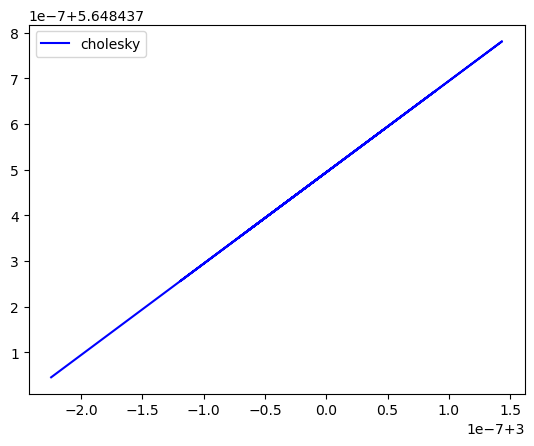

In [13]:
# Cholesky Decomposition
L = np.linalg.cholesky(A.T @ A)
x_chol = inv(L).T @ inv(L) @ A.T @ b
print(x_backslash, x_chol)
plt.plot(feats, np.matmul(A, x_chol), 'b', label="cholesky")
plt.legend(loc="best")

In [14]:
np.linalg.norm(inv(A), ord=2)

9506636.304907266